In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", header = None)

india_df = pd.DataFrame(df[df[1] == "India"].transpose().values, df.iloc[0].values)

india_df.columns=['Cases'] 

india_df = india_df.drop(labels=["Province/State", "Country/Region", "Lat", "Long"], axis=0)

india_df.index = pd.to_datetime(india_df.index)
india_df['Cases'] = india_df['Cases'].astype(float)

india_df['New Cases']= india_df['Cases']-india_df['Cases'].shift(1)

test = india_df[-34:-2]

india_df = india_df[:-34]

print(india_df.tail())

print(test)

                 Cases  New Cases
2021-10-20  34127450.0    18454.0
2021-10-21  34143236.0    15786.0
2021-10-22  34159562.0    16326.0
2021-10-23  34175468.0    15906.0
2021-10-24  34189774.0    14306.0
                 Cases  New Cases
2021-10-25  34202202.0    12428.0
2021-10-26  34215653.0    13451.0
2021-10-27  34231809.0    16156.0
2021-10-28  34246157.0    14348.0
2021-10-29  34260470.0    14313.0
2021-10-30  34273300.0    12830.0
2021-10-31  34285814.0    12514.0
2021-11-01  34296237.0    10423.0
2021-11-02  34308140.0    11903.0
2021-11-03  34321025.0    12885.0
2021-11-04  34333754.0    12729.0
2021-11-05  34344683.0    10929.0
2021-11-06  34355509.0    10826.0
2021-11-07  34366987.0    11478.0
2021-11-08  34377113.0    10126.0
2021-11-09  34388579.0    11466.0
2021-11-10  34401670.0    13091.0
2021-11-11  34414186.0    12516.0
2021-11-12  34426036.0    11850.0
2021-11-13  34437307.0    11271.0
2021-11-14  34447536.0    10229.0
2021-11-15  34456401.0     8865.0
2021-11-16  34

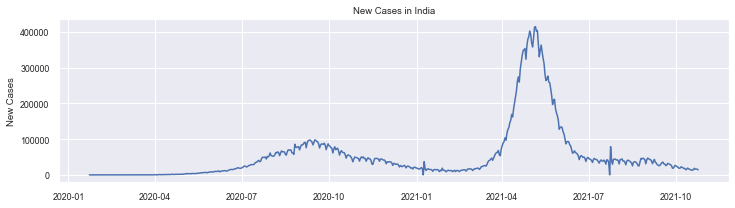

In [7]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

ax = sns.lineplot(x = india_df.index, y  = "New Cases", data = india_df)

plt.title("New Cases in India")
plt.show()

In [11]:
# Dropping New Cases = 0 Values
india_df[india_df["New Cases"] == 0]
india_df.drop(india_df.index[india_df["New Cases"] == 0], axis = 0, inplace = True)
india_df.dropna()

,Cases,New Cases
2020-01-30,1.0,1.0
2020-02-02,2.0,1.0
2020-02-03,3.0,1.0
2020-03-02,5.0,2.0
2020-03-04,28.0,23.0
...,...,...
2021-10-20,34127450.0,18454.0
2021-10-21,34143236.0,15786.0
2021-10-22,34159562.0,16326.0
2021-10-23,34175468.0,15906.0


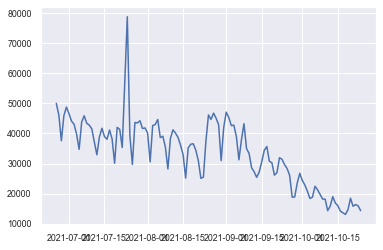

In [14]:
current_death_plot = india_df[-120:]
plt.plot(current_death_plot["New Cases"])

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(total_death_plot.iloc[-100:]['new_cases'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(current_death_plot['New Cases'])

ADF Test Statistic : 0.15667085139650766
p-value : 0.9697239635404193
#Lags Used : 13
Number of Observations Used : 106
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# PACF and ACF Plots

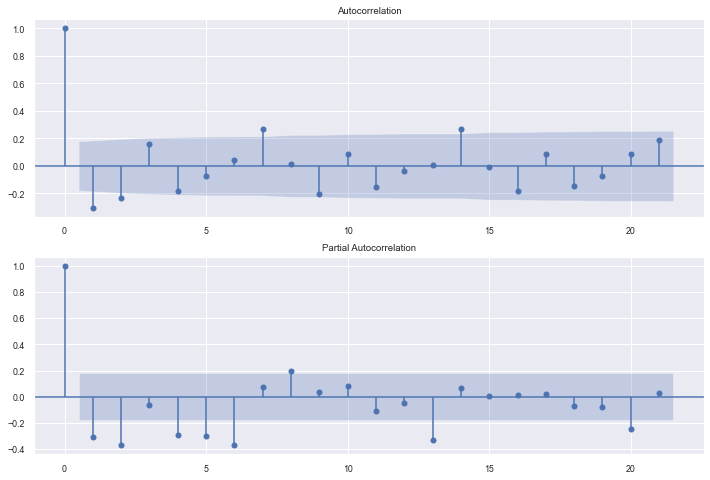

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(current_death_plot['New Cases'].diff()[1:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(current_death_plot['New Cases'].diff()[1:], ax=ax2)

## Plots indicate a ARIMA(2, 1, 2) Model


In [17]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(current_death_plot["New Cases"], stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2433.073, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2455.497, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2447.467, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2435.070, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2453.708, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2430.111, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2425.164, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2434.327, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2428.392, Time=0.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2430.502, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2424.723, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2432.032, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2424.132, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2427.938, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1208.066
Date:                Sun, 28 Nov 2021   AIC                           2424.132
Time:                        10:56:07   BIC                           2435.248
Sample:                             0   HQIC                          2428.646
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3920      0.201     -1.948      0.051      -0.786       0.002
ma.L1         -0.0731      0.210     -0.348      0.728      -0.485       0.339
ma.L2         -0.5030      0.110     -4.571      0.000      -0.719      -0.287
sigma2      3.631e+07   2.69e-08   1.35e+15      0.000    3.63e+07    3.63e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              1379.84
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.46e+31. Standard errors may be unstable.
"""

In [49]:
from statsmodels.tsa.arima.model import ARIMA

testing_data = test

model=ARIMA(current_death_plot['New Cases'],order=(2, 1, 2))
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New Cases   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1208.105
Date:                Sun, 28 Nov 2021   AIC                           2426.210
Time:                        11:08:24   BIC                           2440.106
Sample:                             0   HQIC                          2431.853
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3921      0.229     -1.716      0.086      -0.840       0.056
ar.L2          0.0225      0.192      0.117      0.907      -0.353       0.398
ma.L1         -0.0690      0.242     -0.285      0.776      -0.543       0.405
ma.L2         -0.5208      0.237     -2.194      0.028      -0.986      -0.056
sigma2      3.575e+07    4.2e-08    8.5e+14      0.000    3.58e+07    3.58e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              1393.70
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.96e+29. Standard errors may be unstable.
"""

In [50]:
start = len(current_death_plot)
end = len(current_death_plot) + len(testing_data) -1
pred = model_fit.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

pred.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(pred)

2021-10-25    15309.463474
2021-10-26    15551.386540
2021-10-27    15479.066061
2021-10-28    15512.858844
2021-10-29    15497.983456
2021-10-30    15504.575495
2021-10-31    15501.656473
2021-11-01    15502.949159
2021-11-02    15502.376700
2021-11-03    15502.630211
2021-11-04    15502.517945
2021-11-05    15502.567661
2021-11-06    15502.545644
2021-11-07    15502.555394
2021-11-08    15502.551077
2021-11-09    15502.552989
2021-11-10    15502.552142
2021-11-11    15502.552517
2021-11-12    15502.552351
2021-11-13    15502.552425
2021-11-14    15502.552392
2021-11-15    15502.552406
2021-11-16    15502.552400
2021-11-17    15502.552403
2021-11-18    15502.552402
2021-11-19    15502.552402
2021-11-20    15502.552402
2021-11-21    15502.552402
2021-11-22    15502.552402
2021-11-23    15502.552402
2021-11-24    15502.552402
2021-11-25    15502.552402
Freq: D, Name: predicted_mean, dtype: float64


## SARIMA

In [29]:
training_data1 = india_df['New Cases'][-500:]

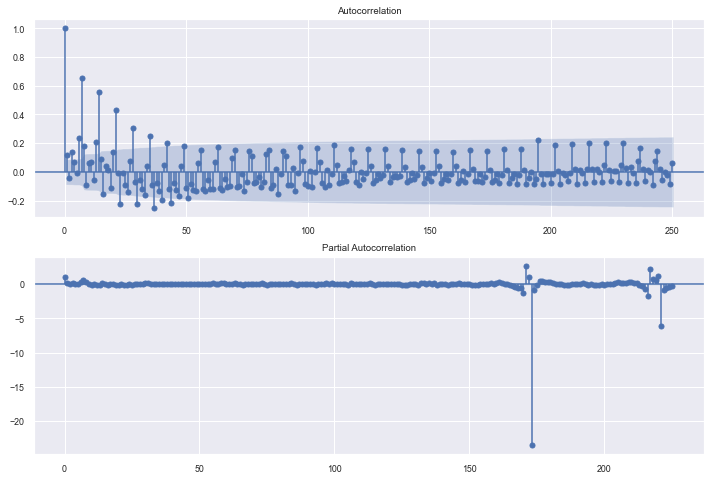

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1.diff()[1:], ax=ax1, lags = 250)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1.diff()[1:], ax=ax2, lags = 225)

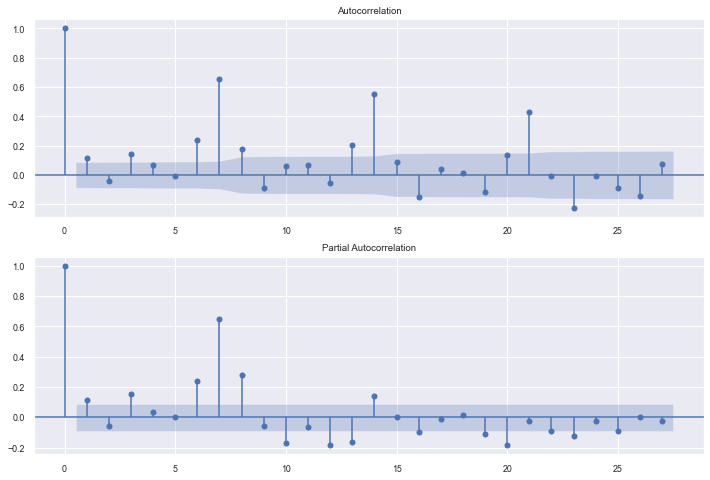

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1.diff()[1:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1.diff()[1:], ax=ax2)

## Plots indicate SARIMA(1, 1, 1)(0, 0, 2, 3)

In [34]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(current_death_plot["New Cases"], seasona=True, m = 3, stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=2430.965, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=2455.497, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=2447.057, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=2436.914, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=2453.708, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=2431.510, Time=0.28 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=2430.257, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=2433.073, Time=0.19 sec
 ARIMA(2,1,2)(2,0,0)[3] intercept   : AIC=2432.075, Time=0.27 sec
 ARIMA(2,1,2)(2,0,1)[3] intercept   : AIC=2432.960, Time=0.64 sec
 ARIMA(1,1,2)(1,0,0)[3] intercept   : AIC=2431.851, Time=0.11 sec
 ARIMA(2,1,1)(1,0,0)[3] intercept   : AIC=2430.240, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=2431.603, Time=0.12 sec
 ARIMA(2,1,1)(2,0,0)[3] intercept   : AIC=2432.183, Time=0.22 sec
 ARIMA(2,1,1)(1,0,1)[3] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(0, 1, 2)x(1, 0, [], 3)   Log Likelihood               -1208.077
Date:                            Sun, 28 Nov 2021   AIC                           2424.155
Time:                                    11:03:56   BIC                           2435.271
Sample:                                         0   HQIC                          2428.669
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4526      0.040    -11.319      0.000      -0.531      -0.374
ma.L2         -0.3024      0.079     -3.841      0.000      -0.457      -0.148
ar.S.L3        0.1276      0.077      1.665      0.096      -0.023       0.278
sigma2      3.745e+07   2.28e-09   1.65e+16      0.000    3.74e+07    3.74e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1338.77
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             2.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.33e+30. Standard errors may be unstable.
"""

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model=SARIMAX(training_data,order=(1,1,1), seasonal_order = (0, 0, 1, 3))
model_fit1=model.fit(disp=0)
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         New Cases   No. Observations:                  450
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 3)   Log Likelihood               -4705.381
Date:                           Sun, 28 Nov 2021   AIC                           9418.762
Time:                                   11:13:17   BIC                           9435.190
Sample:                                        0   HQIC                          9425.237
                                           - 450                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6880      0.083     -8.324      0.000      -0.850      -0.526
ma.L1          0.8136      0.081     10.056      0.000       0.655       0.972
ma.S.L3        0.0517      0.037      1.406      0.160      -0.020       0.124
sigma2      7.545e+07   1.03e-09   7.31e+16      0.000    7.55e+07    7.55e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               712.72
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.69e+32. Standard errors may be unstable.
"""

In [59]:
start = len(training_data1)
end = len(training_data1) + len(testing_data) -1
pred1 = model_fit1.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

pred1.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(pred1)

2021-10-25    14343.648854
2021-10-26    14343.648853
2021-10-27    14343.648854
2021-10-28    14343.648853
2021-10-29    14343.648854
2021-10-30    14343.648854
2021-10-31    14343.648854
2021-11-01    14343.648854
2021-11-02    14343.648854
2021-11-03    14343.648854
2021-11-04    14343.648854
2021-11-05    14343.648854
2021-11-06    14343.648854
2021-11-07    14343.648854
2021-11-08    14343.648854
2021-11-09    14343.648854
2021-11-10    14343.648854
2021-11-11    14343.648854
2021-11-12    14343.648854
2021-11-13    14343.648854
2021-11-14    14343.648854
2021-11-15    14343.648854
2021-11-16    14343.648854
2021-11-17    14343.648854
2021-11-18    14343.648854
2021-11-19    14343.648854
2021-11-20    14343.648854
2021-11-21    14343.648854
2021-11-22    14343.648854
2021-11-23    14343.648854
2021-11-24    14343.648854
2021-11-25    14343.648854
Freq: D, Name: predicted_mean, dtype: float64


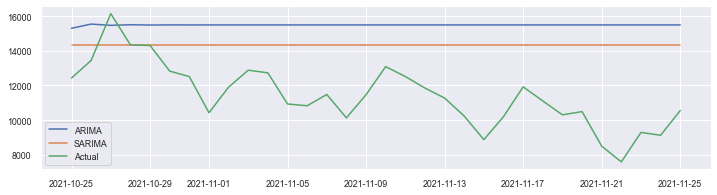

In [60]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(pred, label ='ARIMA')
plt.plot(pred1, label ='SARIMA')
plt.plot(test["New Cases"], label ='Actual')

plt.legend(loc ="best")

In [78]:
# For 1 Day Ahead Forecast
from math import sqrt

print("1 Day Ahead Forecast")
print("ARIMA -", sqrt((pred[0] - test.iloc[0]["New Cases"])**2))
print("SARIMA -", sqrt((pred1[0] - test.iloc[0]["New Cases"])**2))

1 Day Ahead Forecast
ARIMA - 2881.4634744228933
SARIMA - 1915.6488541686758


In [79]:
# For 7 Day Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("7 Day Ahead Forecast")
print("ARIMA - ", rmse(pred[:8], test.iloc[:8]["New Cases"]))
print("SARIMA - ", rmse(pred1[:8], test.iloc[:8]["New Cases"]))

7 Day Ahead Forecast
ARIMA -  2688.380218270449
SARIMA -  1896.1257435415707


In [81]:
# For 1 Month Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("1 Month Ahead Forecast")
print("ARIMA - ", rmse(pred, test["New Cases"]))
print("SARIMA - ", rmse(pred1, test["New Cases"]))

1 Month Ahead Forecast
ARIMA -  4457.518921452215
SARIMA -  3434.1858625005348


## Predicting Vaccination Rate

In [106]:
vac_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv"

vac_df = pd.read_csv(vac_url)

vac_df.index = pd.to_datetime(vac_df.date)
vac_df = vac_df.drop(labels=["date","vaccine", "location", "people_vaccinated", "people_fully_vaccinated", "source_url","total_boosters"], axis=1)


vac_df.tail()

train_vac = vac_df.iloc[:-33]
test_vac = vac_df.iloc[-33:-1]

#print(train_vac.tail())
test_vac.tail()

,total_vaccinations
date,
2021-11-21,1168057227
2021-11-22,1175843376
2021-11-23,1183947210
2021-11-24,1193769229
2021-11-25,1198528642


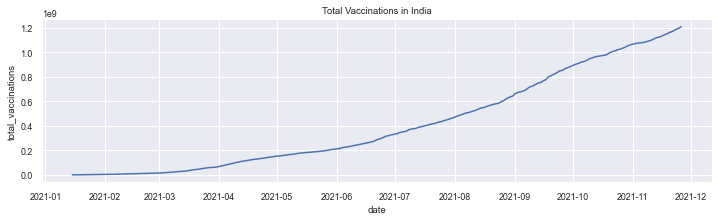

In [107]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

ax = sns.lineplot(x = vac_df.index, y  = "total_vaccinations", data = vac_df)

plt.title("Total Vaccinations in India")
plt.show()

In [108]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(total_death_plot.iloc[-100:]['new_cases'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(vac_df["total_vaccinations"])

ADF Test Statistic : 1.3631259456359566
p-value : 0.9969400182483313
#Lags Used : 12
Number of Observations Used : 292
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# PACF And ACF Plots

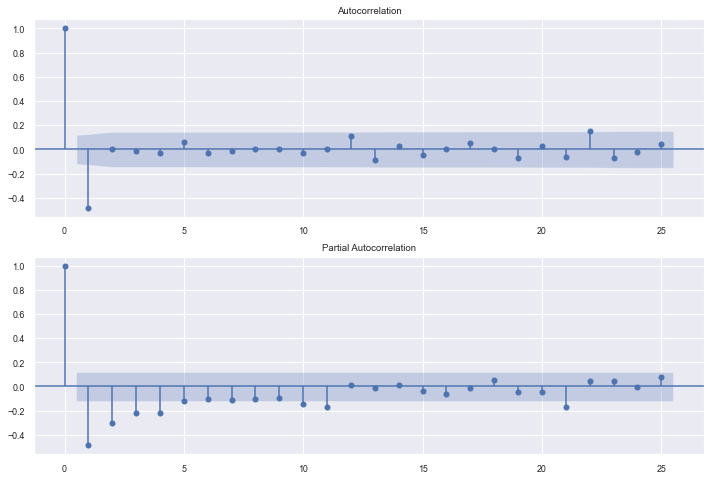

In [110]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_vac["total_vaccinations"].diff().diff()[2:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_vac["total_vaccinations"].diff().diff()[2:], ax=ax2)

# ARIMA(4, 2, 1)

In [112]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(train_vac["total_vaccinations"], d = 2, stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=8647.305, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8783.396, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8712.014, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8642.913, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=8644.747, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=8643.625, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=8645.432, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8646.709, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.511 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  272
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -4319.457
Date:                Sun, 28 Nov 2021   AIC                           8642.913
Time:                        11:36:44   BIC                           8650.110
Sample:                             0   HQIC                          8645.803
                                - 272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8717      0.030    -29.120      0.000      -0.930      -0.813
sigma2      5.234e+12   2.71e-16   1.93e+28      0.000    5.23e+12    5.23e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               347.56
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              20.27   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [114]:
from statsmodels.tsa.arima.model import ARIMA

testing_data = test

vac_model=ARIMA(train_vac["total_vaccinations"],order=(4, 2, 1))
vac_model_fit=vac_model.fit()

vac_model_fit.summary()

start = len(train_vac)
end = len(train_vac) + len(test_vac) -1
vac_pred = vac_model_fit.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

vac_pred.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(vac_pred)

2021-10-25    1.028198e+09
2021-10-26    1.034166e+09
2021-10-27    1.040090e+09
2021-10-28    1.045928e+09
2021-10-29    1.051835e+09
2021-10-30    1.057742e+09
2021-10-31    1.063653e+09
2021-11-01    1.069565e+09
2021-11-02    1.075475e+09
2021-11-03    1.081385e+09
2021-11-04    1.087295e+09
2021-11-05    1.093206e+09
2021-11-06    1.099116e+09
2021-11-07    1.105026e+09
2021-11-08    1.110936e+09
2021-11-09    1.116846e+09
2021-11-10    1.122756e+09
2021-11-11    1.128666e+09
2021-11-12    1.134576e+09
2021-11-13    1.140486e+09
2021-11-14    1.146396e+09
2021-11-15    1.152306e+09
2021-11-16    1.158216e+09
2021-11-17    1.164126e+09
2021-11-18    1.170036e+09
2021-11-19    1.175947e+09
2021-11-20    1.181857e+09
2021-11-21    1.187767e+09
2021-11-22    1.193677e+09
2021-11-23    1.199587e+09
2021-11-24    1.205497e+09
2021-11-25    1.211407e+09
Freq: D, Name: predicted_mean, dtype: float64


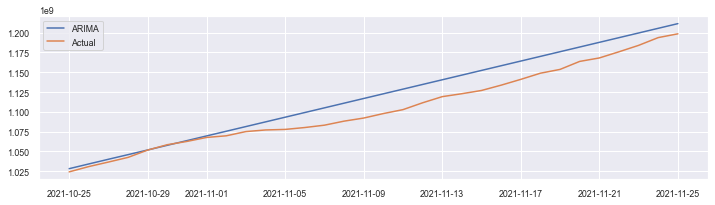

In [115]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(vac_pred, label ='ARIMA')
plt.plot(test_vac["total_vaccinations"], label ='Actual')

plt.legend(loc ="best")

In [116]:
# For 1 Month Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("1 Month Ahead Forecast")
print("ARIMA - ", rmse(vac_pred, test_vac["total_vaccinations"]))

1 Month Ahead Forecast
ARIMA -  17305161.435187403
